In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as dt


In [36]:
CustomerDataSet=pd.read_csv('C:/Users/pc/Desktop/My dataSciense road/RFM/Data1.csv')

In [37]:
CustomerDataSet.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [38]:
CustomerDataSet.shape

(541909, 8)

In [39]:
CustomerDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [40]:
CustomerDataSet.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [41]:
CustomerDataSet['Country'].describe()

count             541909
unique                38
top       United Kingdom
freq              495478
Name: Country, dtype: object

<Axes: xlabel='Country'>

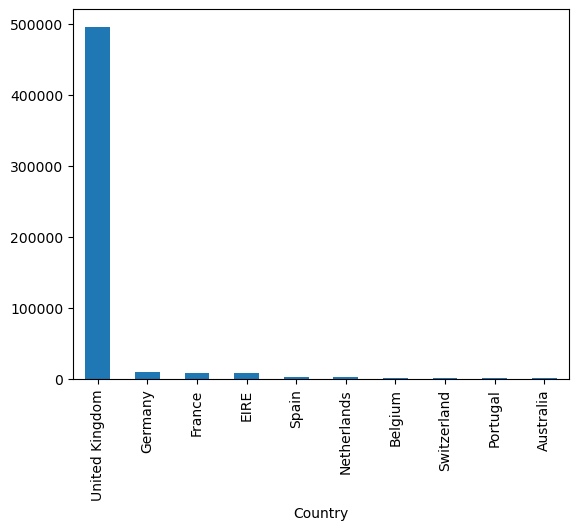

In [42]:
CustomerDataSet['Country'].value_counts()[0:10].plot(kind='bar')

In [43]:
UK_DataSet=CustomerDataSet[CustomerDataSet['Country']=='United Kingdom']

In [44]:
UK_DataSet.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [45]:
UK_DataSet.shape

(495478, 8)

In [46]:
UK_DataSet=UK_DataSet[UK_DataSet['Quantity']>0]

In [47]:
UK_DataSet.shape

(486286, 8)

In [48]:
UK_DataSet.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     131941
Country             0
dtype: int64

In [49]:
UK_DataSet.dropna(subset=['CustomerID'],inplace=True,)

In [50]:
UK_DataSet.shape

(354345, 8)

In [51]:
print("Summary: ")
print("the number of transaction is: " ,UK_DataSet['InvoiceNo'].nunique())
print("the number of customers is: ",UK_DataSet['CustomerID'].nunique())
print("the number of products bought is: ",UK_DataSet['StockCode'].nunique())



Summary: 
the number of transaction is:  16649
the number of customers is:  3921
the number of products bought is:  3645


In [52]:
data=UK_DataSet.drop(columns=['Country']).drop(columns=['Description']).drop(columns=['StockCode'])

In [53]:
data.tail(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
541884,581585,12,12/9/2011 12:31,1.25,15804.0
541885,581585,12,12/9/2011 12:31,0.85,15804.0
541886,581585,12,12/9/2011 12:31,0.39,15804.0
541887,581585,4,12/9/2011 12:31,3.75,15804.0
541888,581585,12,12/9/2011 12:31,0.95,15804.0
541889,581585,12,12/9/2011 12:31,1.95,15804.0
541890,581586,8,12/9/2011 12:49,2.95,13113.0
541891,581586,24,12/9/2011 12:49,1.25,13113.0
541892,581586,24,12/9/2011 12:49,8.95,13113.0
541893,581586,10,12/9/2011 12:49,7.08,13113.0


Recency


In [54]:
UK_DataSet['InvoiceDate']=pd.to_datetime(UK_DataSet['InvoiceDate'])


In [55]:
UK_DataSet['InvoiceDate'].min(),UK_DataSet['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [56]:
data['InvoiceDate']=UK_DataSet['InvoiceDate']

In [57]:
present=dt.date(2011,12,11)
now=pd.to_datetime(present)
type(now)

pandas._libs.tslibs.timestamps.Timestamp

In [58]:
data.head(100)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
115,536381,1,2010-12-01 09:41:00,2.55,15311.0
116,536381,10,2010-12-01 09:41:00,1.65,15311.0
117,536381,3,2010-12-01 09:41:00,1.69,15311.0
118,536381,1,2010-12-01 09:41:00,1.95,15311.0


In [59]:
data['total price']=data['Quantity']*data['UnitPrice']

In [60]:
data.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,total price
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [61]:
rfm= data.groupby('CustomerID').agg({'InvoiceDate': lambda date:
(now - date.max()).days, 'InvoiceNo': lambda num: len(num),
'total price': lambda price: price.sum()})

In [62]:
rfm.head()

,InvoiceDate,InvoiceNo,total price
CustomerID,,,
12346.0,326,1,77183.60
12747.0,3,103,4196.01
12748.0,1,4596,33719.73
12749.0,4,199,4090.88
12820.0,4,59,942.34


C:\Users\pc\AppData\Local\Temp\ipykernel_8720\3457897778.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(rfm['InvoiceDate'])


<Axes: xlabel='InvoiceDate', ylabel='Density'>

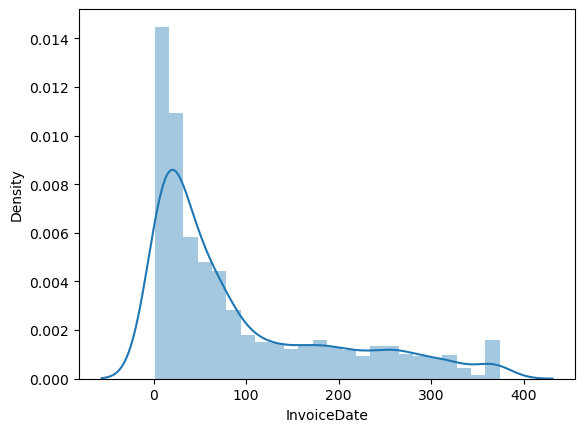

In [63]:
sn.distplot(rfm['InvoiceDate'])

In [64]:
rfm.columns =['recency','frequency', 'monetary']
rfm['recency'] = rfm['recency'].astype(int)
print(rfm.head())

            recency  frequency  monetary
CustomerID                              
12346.0         326          1  77183.60
12747.0           3        103   4196.01
12748.0           1       4596  33719.73
12749.0           4        199   4090.88
12820.0           4         59    942.34


In [65]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])
print(rfm.head())

            recency  frequency  monetary r_quartile f_quartile m_quartile
CustomerID                                                               
12346.0         326          1  77183.60          4          4          1
12747.0           3        103   4196.01          1          1          1
12748.0           1       4596  33719.73          1          1          1
12749.0           4        199   4090.88          1          1          1
12820.0           4         59    942.34          1          2          2


In [66]:
rfm['RFM_Score'] = rfm['r_quartile'].astype(str) + rfm['f_quartile'].astype(str) + rfm['m_quartile'].astype(str)


In [67]:
print(rfm[rfm['RFM_Score']=='111'].sort_values('monetary',ascending=False).head())


            recency  frequency   monetary r_quartile f_quartile m_quartile  \
CustomerID                                                                   
18102.0           1        431  259657.30          1          1          1   
17450.0           9        337  194550.79          1          1          1   
17511.0           3        963   91062.38          1          1          1   
16684.0           5        277   66653.56          1          1          1   
14096.0           5       5111   65164.79          1          1          1   

           RFM_Score  
CustomerID            
18102.0          111  
17450.0          111  
17511.0          111  
16684.0          111  
14096.0          111  
